In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
import pandas as pd

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'] 

In [ ]:
## 1. Supp_Figure_8c ---  ---    

/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/Unmod_256_alignment_summary.txt 0 0.8914988814317674 0.8914988814317674 894
/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/Unmod_256_alignment_summary.txt 1 0.8914988814317674 0.8934977578475336 892
/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/Unmod_256_alignment_summary.txt 2 0.8870246085011185 0.919953596287703 862
/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/Unmod_256_alignment_summary.txt 2.5 0.8791946308724832 0.9312796208530806 844
/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/Unmod_256_alignment_summary.txt 3 0.8668903803131991 0.9428223844282239 822
/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/Unmod_256_alignment_summary.txt 3.5 0.8557046979865772 0.9550561797752809

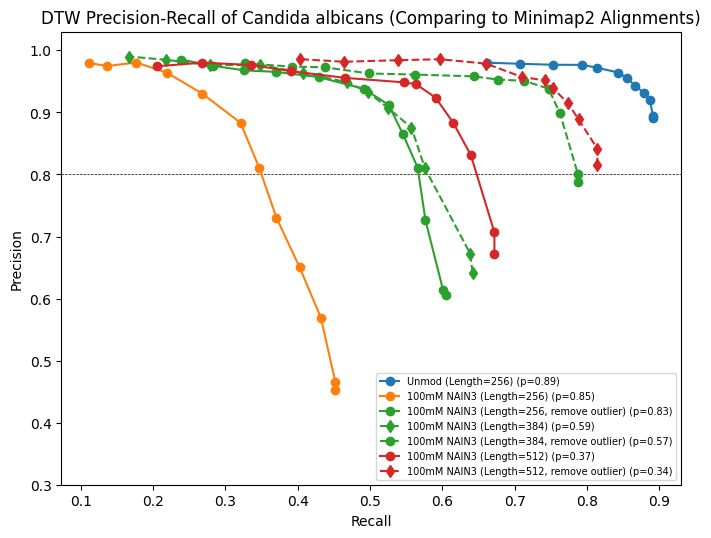

In [3]:
f_truth_dir = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/"
f_batch_dir = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/"


f_names = [(f_batch_dir+"Unmod_256_alignment_summary.txt", 
            f_truth_dir+"220908_30C_DMSO_truth_minimap2_sorted.map", "Unmod (Length=256)"),
           
           (f_batch_dir+"100mMNAIN3_256_alignment_summary.txt", 
            f_truth_dir+"220908_30C_100mMNAIN3_truth_minimap2_sorted.map", "100mM NAIN3 (Length=256)"),
           (f_batch_dir+"100mMNAIN3_256_remove_outliers_alignment_summary.txt", 
            f_truth_dir+"220908_30C_100mMNAIN3_truth_minimap2_sorted.map", "100mM NAIN3 (Length=256, remove outlier)"),

           (f_batch_dir+"100mMNAIN3_384_alignment_summary.txt", 
            f_truth_dir+"220908_30C_100mMNAIN3_truth_minimap2_sorted.map", "100mM NAIN3 (Length=384)"),
           (f_batch_dir+"100mMNAIN3_384_remove_outliers_alignment_summary.txt", 
            f_truth_dir+"220908_30C_100mMNAIN3_truth_minimap2_sorted.map", "100mM NAIN3 (Length=384, remove outlier)"),

           (f_batch_dir+"100mMNAIN3_512_alignment_summary.txt", 
            f_truth_dir+"220908_30C_100mMNAIN3_truth_minimap2_sorted.map", "100mM NAIN3 (Length=512)"),
           (f_batch_dir+"100mMNAIN3_512_remove_outliers_alignment_summary.txt", 
            f_truth_dir+"220908_30C_100mMNAIN3_truth_minimap2_sorted.map", "100mM NAIN3 (Length=512, remove outlier)")] 

### plots ------------------------------

fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=100)

dfs = []
for no, (f_name, f_truth, category) in enumerate(f_names):
    df_align = pd.read_csv(f_name, sep="\t", names=["iid", "pred", "score", "avg", "pct_diff", "time"], index_col=0)
    df_truth = pd.read_csv(f_truth, sep="\t", names=["iid", "truth"], index_col=0)
    df = df_align.join(df_truth, how="inner")
    df["category"] = category

    precisions = []
    sensitivities = []
    thresholds = range(0, 10)
    thresholds = [0, 1, 2, 2.5, 3, 3.5, 4, 5, 6, 7, 8, 9]
    for i in thresholds:
        sensitivity = np.count_nonzero((df["pred"] == df["truth"]) & (df["pct_diff"] >= i))/df.shape[0]
        precision = np.count_nonzero((df["pred"] == df["truth"]) & (df["pct_diff"] >= i))/np.count_nonzero(df["pct_diff"] >= i)
        print(f_name, i, sensitivity, precision, np.count_nonzero(df["pct_diff"] >= i))
        precisions.append(precision)
        sensitivities.append(sensitivity)

    rearrange_indices = {3: 0, 4: 0, 6: 1, 7: 1, 9: 2, 10: 2}
    if no in list(rearrange_indices.keys()):
        if no in (1, 4, 7):
            ax.plot(sensitivities, precisions, "o--", label=category + (" (p=%.2f)" % (df.shape[0]/1000)), color=colors[rearrange_indices[no]+2])
        else:
            ax.plot(sensitivities, precisions, "d--", label=category + (" (p=%.2f)" % (df.shape[0]/1000)), color=colors[rearrange_indices[no]+2])
    else:
        ax.plot(sensitivities, precisions, "o-", label=category + (" (p=%.2f)" % (df.shape[0]/1000)))
    
ax.set_ylim(0.3, 1.03)
ax.set_ylabel("Precision")
ax.set_xlabel("Recall")
ax.legend(loc="lower right", fontsize=7)
ax.set_title("DTW Precision-Recall of Candida albicans (Comparing to Minimap2 Alignments)")
ax.axhline(0.80, linestyle="--", color="black", linewidth=0.5, zorder=-1)

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/'
plt.savefig(dir_out+'Supp_Figure_8c_candida_DTW_performance.pdf',bbox_inches='tight', dpi=300) 